### Nesterov(Nesterov Accelerated Gradient)  
アイデア:一歩先の予測地点の勾配を使う
Point:Momentumアルゴリズムの勾配計算時のパラメータの位置を予測位置に変更する

$$
    \boldsymbol{\nu}^t \leftarrow \eta\nu^{t-1} -\alpha\frac{\partial L(\boldsymbol{w}^t + \nu^{t-1})}{\partial\boldsymbol{W}} \\
    \boldsymbol{W}^{t+1} \leftarrow \boldsymbol{W}^t + \nu^t
$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class Nesterov:
    def __init__(self, f, df, alpha=0.01, eta=0.9, eps=1e-6):
        self.f_= f
        self.df_= df
        self.alpha_= alpha
        self.eta_ = eta
        self.eps_= eps
        self.path_= None
        
    def solve(self, init):
        x = init
        v = np.zeros_like(x)
        m = v
        path = []
        path.append(x)
        grad = self.df_(x)
        
        while (grad**2).sum() > self.eps_**2:
            grad = self.df_(x + v) # 予測地点における勾配
            m = self.eta_ * v - self.alpha_ * grad # 慣性項の計算
            x = x + m
            v = m
            path.append(x)
            
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f_(x)

勾配降下法

In [5]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f_= f
        self.df_= df
        self.alpha_= alpha
        self.eps_= eps
        self.path_= None
        
    def solve(self, init):
        x = init
        path = []
        path.append(x)
        grad = self.df_(x)
        
        while (grad**2).sum() > self.eps_**2:
            grad = self.df_(x)
            x = x - self.alpha_ * grad
            path.append(x)
            
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f_(x)

In [6]:
# 目的関数
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x ** 2 - 6 * x * y + 3 * y ** 2 + 6 * x - 6 * y

# 目的関数の微分
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

In [10]:
algo = GradientDescent(f, df)
initial = np.array([1.2, 3.2])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.38025110e-07 1.00000047e+00]
-2.99999999999972


### Nesterov Test

[1.31019209e-07 1.00000018e+00]
-2.9999999999999574


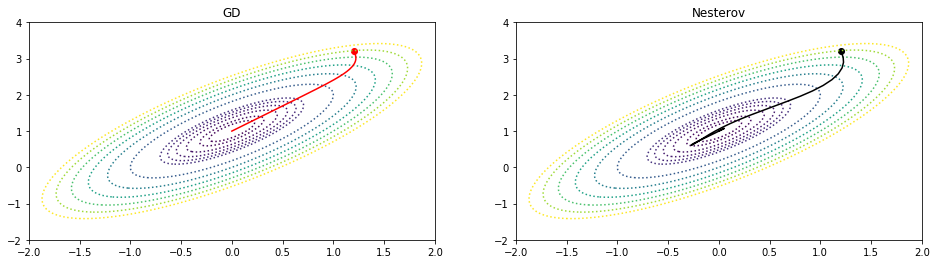

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

# 左図 init (1.2, 3.2) SGD
ax[0].scatter(initial[0], initial[1], color="r", marker="o")
ax[0].plot(algo.path_[:, 0], algo.path_[:, 1], color="r", linewidth=1.5)

xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 4, 400)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
ax[0].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, linestyles="dotted")

ax[0].set_ylim([-2, 4])
ax[0].set_xlim([-2, 2])
ax[0].set_title('GD')

# 右図 init (1.2, 3.2) Momentum
Nalgo = Nesterov(f, df)
initial = np.array([1.2, 3.2])
Nalgo.solve(initial)
print(Nalgo.x_)
print(Nalgo.opt_)

ax[1].scatter(initial[0], initial[1], color="k", marker="o")
ax[1].plot(Nalgo.path_[:, 0], Nalgo.path_[:, 1], color="k", linewidth=1.5)
ax[1].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, linestyles="dotted")

ax[1].set_ylim([-2, 4])
ax[1].set_xlim([-2, 2])
ax[1].set_title('Nesterov')

plt.show()